In [1]:
import numpy as np
fruits = np.load('../data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)            # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개ㅐ수는 샘플 개수입니다. 그렇지 않으면 10개 입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:        # n 개까지만 그립니다
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

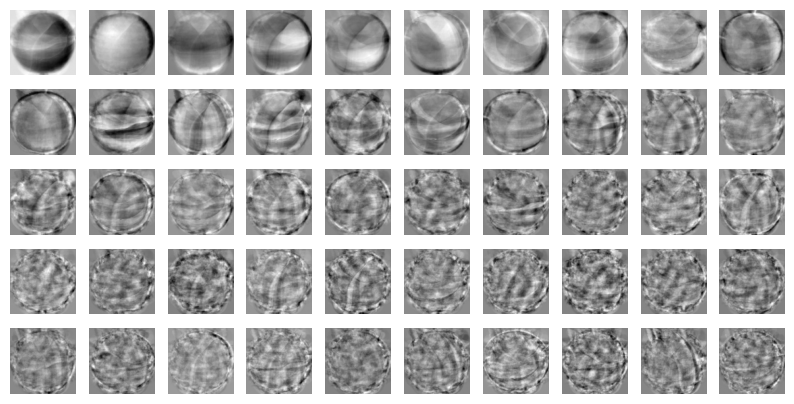

In [6]:
draw_fruits(pca.components_.reshape(-1, 100,100))

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


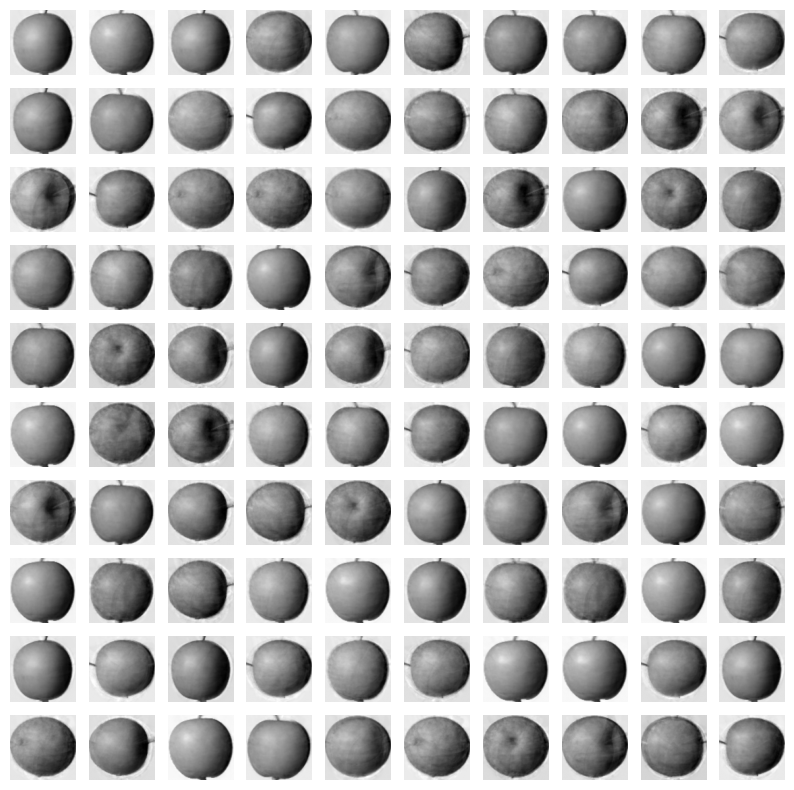

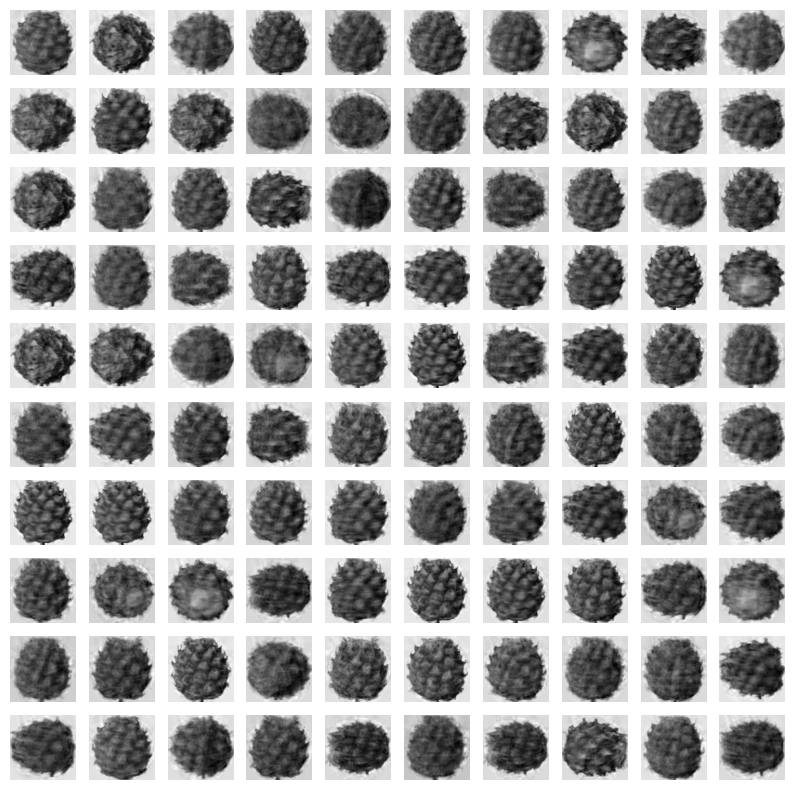

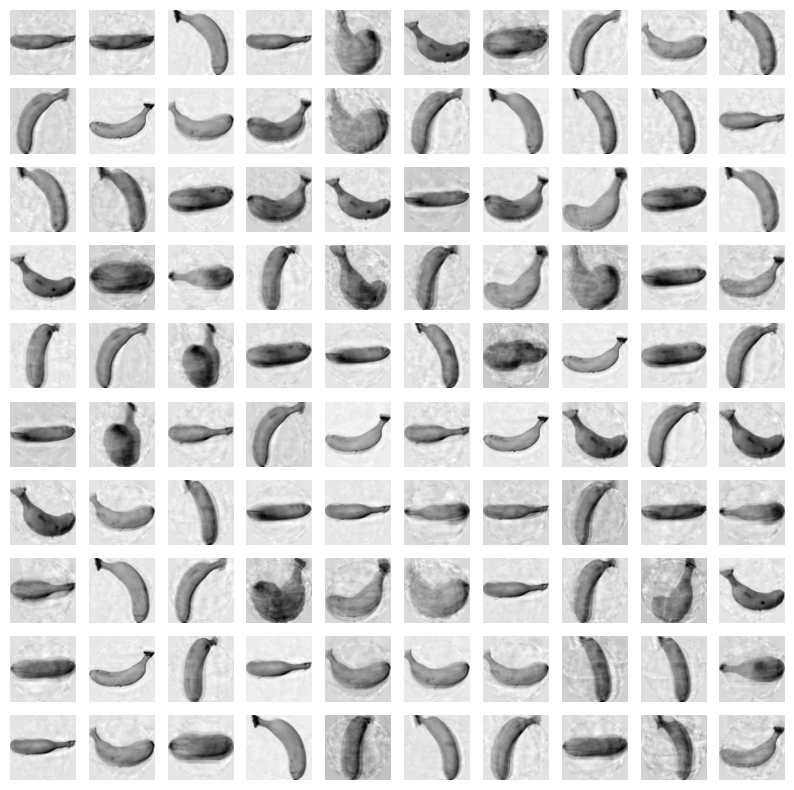

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9215945416670148


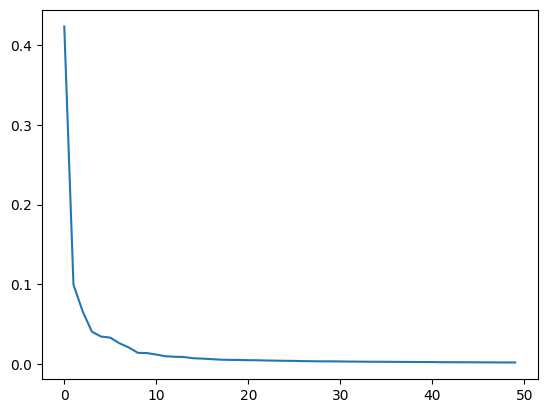

In [16]:
plt.plot((pca.explained_variance_ratio_))
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression

In [18]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [21]:
from sklearn.model_selection import cross_validate

# Create an instance of LogisticRegression
lr_instance = LogisticRegression()

# Perform cross-validation
scores = cross_validate(lr_instance, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.4476940631866455


In [24]:
scores = cross_validate(lr_instance, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.010771036148071289


In [25]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [26]:
print(pca.n_components_)

2


In [27]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [29]:
# Create an instance of LogisticRegression
lr_instance = LogisticRegression()

# Perform cross-validation
scores = cross_validate(lr_instance, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.01875724792480469


C:\Users\1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


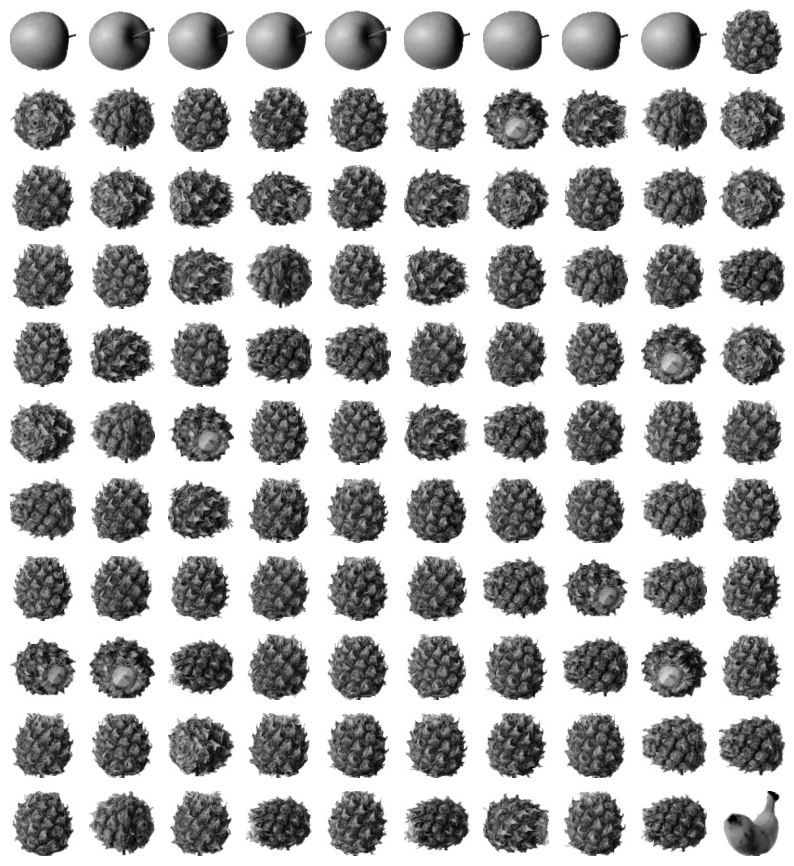

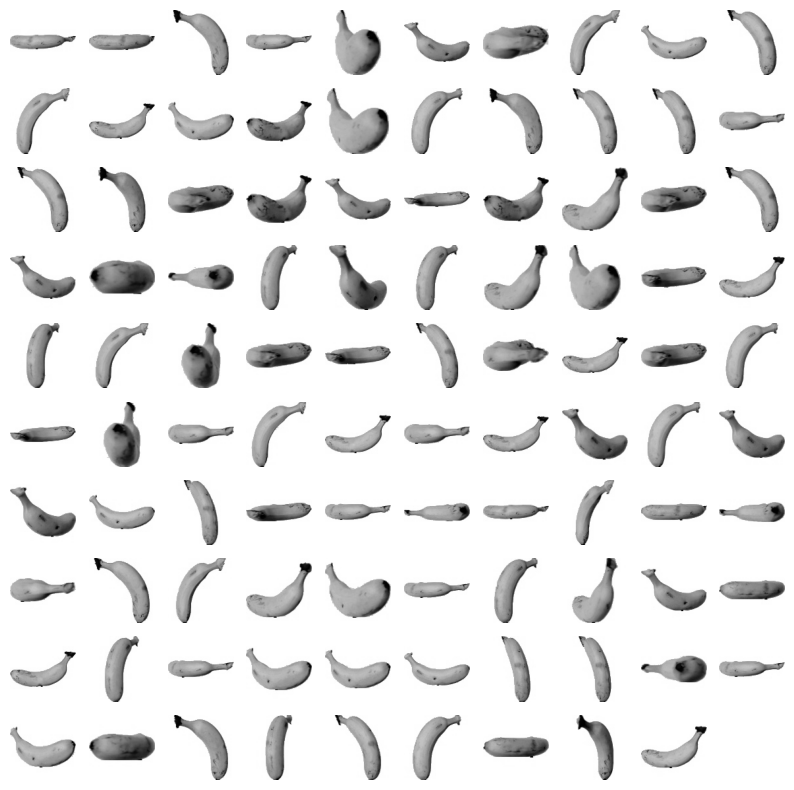

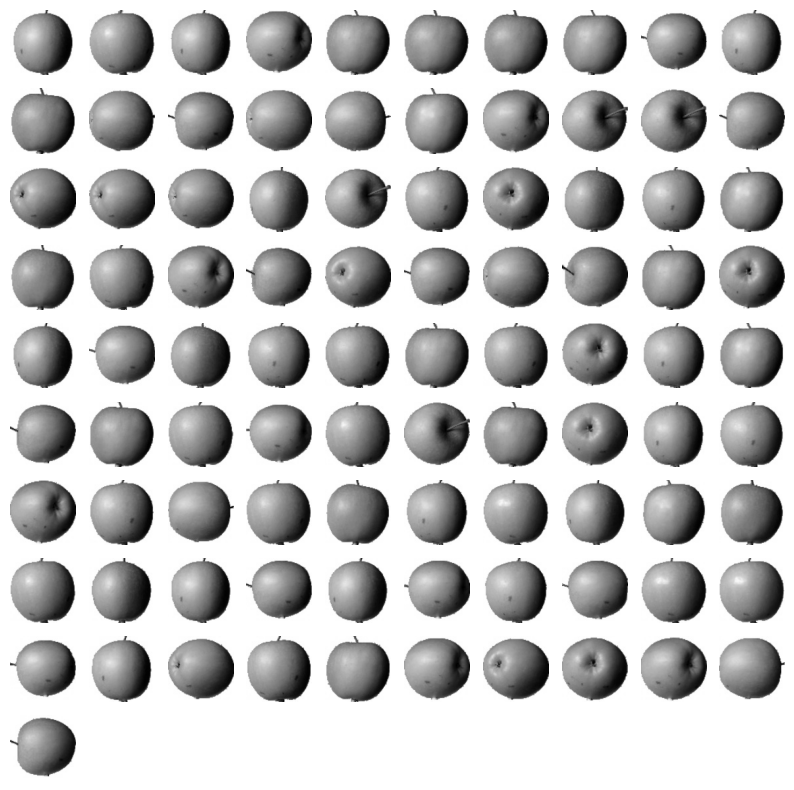

In [32]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

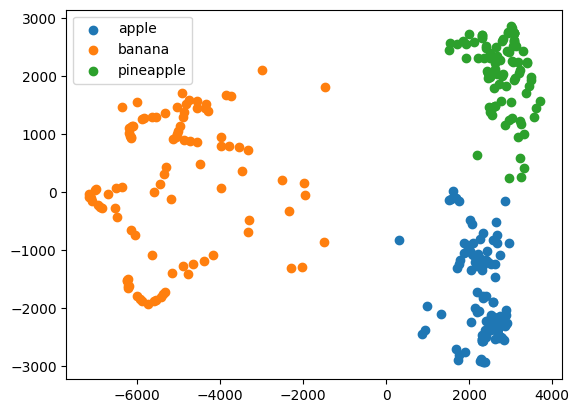

In [33]:
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()